<a href="https://colab.research.google.com/github/hjn14133/DSP/blob/main/Karplus_Strong_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# The Karplus-Strong algorithm is a simple digital feedback loop 
# with an internal buffer of M samples. 
# The buffer is filled with a set of initial values and the loop, when running, 
# produces an arbitraryly long output signal. 
# Although elementary, the K-S loop can be used to synthesize interesting musical sounds 
# as we will see in this notebook.
def KS_1(x, N):
    # given the initial buffer x, produce a N-sample output
    #  by concatenating identical copies of the buffer
    y = x
    while len(y) < N:
        # keep appending until we reach or exceed the required length
        y = np.append(y, x)
    # trim the excess
    y = y[0:N+1]
    return y

In [2]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import IPython

In [4]:
plt.rcParams["figure.figsize"] = (14,4)

In [5]:
# Set internal "clock" of the system - sampling rate

Fs = 16000 # 16 KHz sampling rate

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


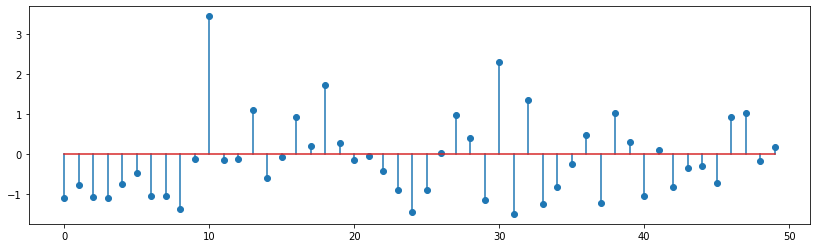

In [6]:
b = np.random.randn(50)
plt.stem(b);

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  """


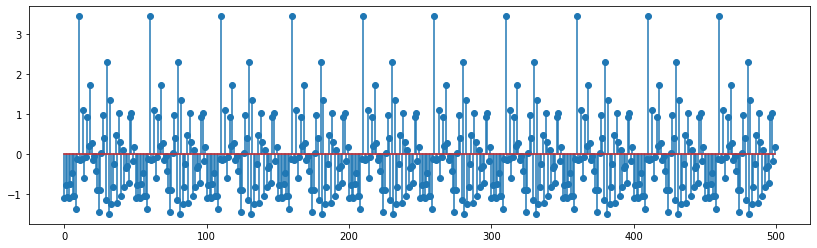

In [7]:
# Generate a 2-sec audio clip
y = KS_1(b, Fs * 2)

# we can look at a few periods:
plt.stem(y[0:500]);

In [8]:
IPython.display.Audio(y, rate=Fs)

In [9]:
# let's play an octave lower: just double the initial buffer's length
IPython.display.Audio(KS_1(np.random.rand(100), Fs * 2), rate=Fs)

OK, so the K-S algorithm works! From the signal processing point of view, we can describe the system with the following block diagram (neglect the factor $\alpha$ for a moment)

![title](ks.png)

The output can be expressed as
$$
    y[n] = x[n] + y[n - M]
$$
assuming that the input is the finite-support signal
$$
x[n] = \begin{cases}
    0 & \mbox{for $n < 0$} \\
    b_n & \mbox{for $0 \le n < M$} \\
    0 & \mbox{for $n \ge M$}
  \end{cases}
$$

Let's implement the K-S algorithm as a signal processing loop


In [11]:
def KS_2(x, N):
    # length of the input
    M = len(x)
    # prepare the output
    y = np.zeros(N)
    # this is NOT an efficient implementation, but it shows the general principle
    # we assume zero initial conditions (y[n]=0 for n < 0)
    for n in range(0, N):
        y[n] = (x[n] if n < M else 0) + (y[n-M] if n-M >= 0 else 0)
    return y

In [12]:
# it should still work
IPython.display.Audio(KS_2(np.random.rand(50), Fs * 2), rate=Fs)

By looking at block diagram we can see a simple modification that adds a lot of realism to the sound: by setting  αα  to a value close to but less that one, we can introuce a decay in the note that produces guitar-like sounds:
y[n]=x[n]+αy[n−M]




In [13]:
def KS_3(x, N, alpha = 0.99):
    M = len(x)
    y = np.zeros(N)
    # 
    for n in range(0, N):
        y[n] = (x[n] if n < M else 0) + alpha * (y[n-M] if n-M >= 0 else 0)
    return y

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


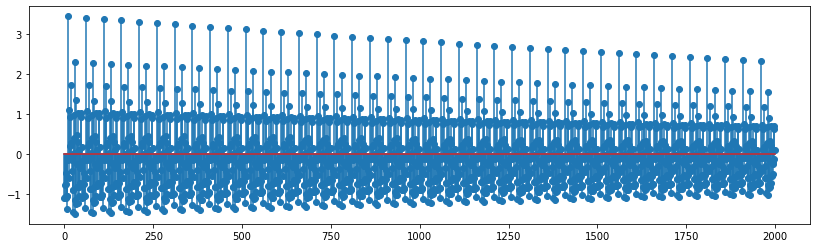

In [14]:
y = KS_3(b, Fs * 2)
plt.stem(y[0:2000]);

In [15]:
IPython.display.Audio(y, rate=Fs)

In [16]:
def KS(x, N, alpha = 0.99):
    # we will adjust alpha so that all notes have a decay
    #  comparable to that of a buf len of 50 samples
    REF_LEN = 50
    M = len(x)
    a = alpha ** (float(M) / REF_LEN)
    y = np.zeros(N)
    # 
    for n in range(0, N):
        y[n] = (x[n] if n < M else 0) + a * (y[n-M] if n-M >= 0 else 0)
    return y

In [17]:
IPython.display.Audio(KS(np.random.rand(50), Fs * 2), rate=Fs)

In [18]:
IPython.display.Audio(KS(np.random.rand(10), Fs * 2), rate=Fs)